In [2]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
# necessary libraries will be imported further 

# PART 0 : Reading the Data

In [3]:
#reading csv
data=pd.read_csv(r'C:\Users\ajay\Downloads\Fytlyff_DS_Interview.csv')

In [4]:
#head
data.head(3)

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461


In [5]:

#shape of data
data.shape

(2160, 10)


**Observe the column names and the data types in each column**

In [6]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Year                                                                                                                       2160 non-null   int64  
 1   Month                                                                                                                      2160 non-null   object 
 2   MobileWeb_or_Web                                                                                                           2160 non-null   object 
 3   Type_of_Customers?                                                                                                         2160 

            Data has null values

# Part 1 :Data Cleaning

***Write a function called data_cleaning() which, when called, would perform the following activity:***
1. Replaces the NA values with 0s in the data\
2. In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on…\
3. In column ‘E’ Replace “Came_From_Google” with “Google” and “Landed_on_the_page_Directly” with “Direct_traffic” 


In [7]:
# function
def data_cleaning(df):
    # replace NaN values with
    dat=df.fillna(0)
    
    #In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on…
    for i,j in enumerate(dat['Month'].unique()):
        dat=dat.replace({'Month':{j:i+1}})    

    # In column ‘E’ Replace “Came_From_Google” with “Google” and “Landed_on_the_page_Directly” with “Direct_traffic” 
    dat=dat.replace({'Where_Are_They_comming_from?':{'Came_From_Google':'Google',
                                                                                    'Landed_on_the_page_Directly':'Direct_traffic'}})
    
    return dat

In [8]:
# testing function and cleaning data

data=data_cleaning(data)

            Working Well!

# Part 2: Descriptive statistics

● Write a function called descriptive_stats() which, when called, would perform the following activity:
1. Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical
columns
2. Produce a list of all the unique values & data types present in the non-numeric columns

In [9]:
# function
def descriptive_stats(df,type=None):                # here we have to pass which type of features we want stas :object for categorical ,num for numerical 
    if type=='object':        
        return df.describe(include=['O'])
    elif type=='num':
        return df.describe(include=['int','float'])
    else:
        return df.describe(include=['O','int','float'])

In [10]:
# test function
descriptive_stats(data,'object')


,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?
count,2160,2160,2160,2160
unique,2,2,3,5
top,Desktop_Website,Existing_Customer,Google,Bangalore
freq,1080,1080,720,432


In [11]:
data.describe()

,Year,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
count,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03
mean,2020.000000,6.500000,3.922474e+05,1.792281e+05,1.510725e+05,5.922129e+04
std,0.816686,3.452852,9.555773e+05,3.951562e+05,2.353538e+05,8.646564e+04
min,2019.000000,1.000000,0.000000e+00,0.000000e+00,3.761000e+03,7.660000e+02
25%,2019.000000,3.750000,0.000000e+00,0.000000e+00,3.360800e+04,1.157725e+04
50%,2020.000000,6.500000,1.228350e+04,4.212500e+03,7.064950e+04,2.700450e+04
75%,2021.000000,9.250000,3.816422e+05,1.730452e+05,1.659590e+05,7.185350e+04
max,2021.000000,12.000000,1.127413e+07,4.079301e+06,3.022858e+06,1.251258e+06


# Part 3: Prescriptive statistics

**Can you write code and present the data which would help us answer (Text in “” are column names) :**\
1. “Which_Place_in_India?”  has the highest “How_many_Landed_on_the_our_Page?”
2. “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” divided by “How_many_Landed_on _our_Page?” is highest for “Which_Place_in_India?”  


In [12]:
# 1. “Which_Place_in_India?” has the highest “How_many_Landed_on_the_our_Page?”

data.groupby(['Which_Place_in_India?'])['How_many_Landed_on_our_Page?'].sum().reset_index().sort_values('How_many_Landed_on_our_Page?',ascending=False).head(1)

,Which_Place_in_India?,How_many_Landed_on_our_Page?
4,Pune,319132898.0


In [13]:
# 2 .“How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” divided by “How_many_Landed_on _our_Page?” is highest for “Which_Place_in_India?”


    # lets make a dataframe first which will include average landed on page of  every place
average_landed=data.groupby('Which_Place_in_India?')['How_many_Landed_on_our_Page?'].mean().reset_index()
    
    # let's make another dataframe which will include sum of last column i.e landed to submit
sum_submit=data.groupby('Which_Place_in_India?')['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].sum().reset_index()

    # last dataframe which will tell highest
pd.DataFrame({'Place':average_landed['Which_Place_in_India?'],
             'Highest':sum_submit['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']/average_landed['How_many_Landed_on_our_Page?']})

,Place,Highest
0,Bangalore,85.330440
1,Chennai,69.368575
2,Dehradun,60.873038
3,Indore,80.684003
4,Pune,47.452202


            Highest is in Bangalore

# Part 4: Simple Machine learning questions

**Write a function called pred_future() which, when called, would perform the following activity:**\
1. Predict “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” for the complete year of 2022
2. Generate the overall MAPE of your prediction for the year 2021

            For creating and applying model we need to do feature engineering and feature scaling first 

**Feature Engineering**\
                . Feature Engineering and feature scaling is must for implementing a Model. 

In [14]:
data.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033


In [15]:
# binary encoding 

#MobileWeb_or_web
data=data.replace({'MobileWeb_or_Web':{'Desktop_Website':0,
                                      'Mobile_website':1}})
#Type_of_Customers?
data=data.replace({'Type_of_Customers?':{'Existing_Customer':0,
                                       'New_Customer':1}})

#Where_Are_They_comming_from
data=data.replace({"Where_Are_They_comming_from?":{'Google':0,
                                                  'Direct_traffic':1,
                                                  'Unidentified_Sources':2}})

#Which_Place_in_India?
data=data.replace({'Which_Place_in_India?':{'Bangalore':0,
                                           'Chennai':1,
                                           'Dehradun':2,
                                           'Indore':3,
                                           'Pune':4}})

In [16]:
#data sample
data.sample(3)

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
2154,2021,12,1,1,1,4,6229775.0,1498689.0,952269,338476
1217,2020,9,0,1,0,2,113706.0,69797.0,35051,25337
127,2019,3,0,0,1,2,0.0,0.0,86553,22636


In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

**Train Test Split**

In [18]:
#library
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

C:\Users\ajay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?', ylabel='Density'>

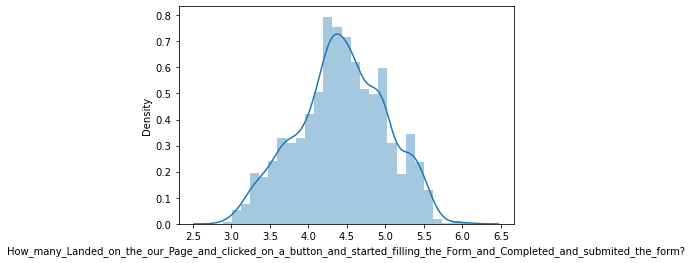

In [19]:
#plot dependent variable
sns.distplot(np.log10(y))

**Feature Scaling**

In [20]:
#library 
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

# independet feature scaling
x_train.iloc[:,6:]=scaler.fit_transform(x_train.iloc[:,6:])
x_test.iloc[:,6:]=scaler.fit_transform(x_test.iloc[:,6:])

#dependent feature scaling
y_train=np.log10(y_train)
y_test=np.log10(y_test)


In [21]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

**NOTE**: *I am skipping some steps like outlier check , multicolinearity check etc and directly coming into main goal i.e Part 4 of this project. Therefore performance of model may vary.*

In [22]:
# Predict “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” for the complete year of 2022

# let's make function
def pred_future(test):
    pred_df=x_test.join(pd.Series(y_test,name='actual')).join(pd.Series(model.predict(x_test),index=x_test.index,name='preds')) # predicting and saving to its correspond test data
    pred_2021=pred_df[pred_df['Year']==2021][['preds']]                                  # extracting prediction of year 2021 so we can calculate MAPE of that year
    actual_2021=pred_df[pred_df['Year']==2021][['actual']]                              # extracting actual values for year 2012 for calculating MAPE for 202
    
    #calculate MAPE for 2021
    
    mape=np.mean(abs(actual_2021.values-pred_2021.values))*100
    
    print('MAPE for year 2021 is {}'.format(mape))
    return 'Predction for year 2022 ' ,pred_2021
    
    

In [23]:
# test for  function
pred_future(x_test)

MAPE for year 2021 is 28.701484592725386


('Predction for year 2022 ',
          preds
 1516  4.751989
 2109  4.933594
 1720  3.517433
 1447  4.262495
 1782  3.687246
 ...        ...
 1843  3.848602
 2141  3.670824
 1529  4.308601
 1773  4.523420
 2155  3.824241
 
 [139 rows x 1 columns])

            Part 4 has been completed

# Part 5: Visualization

● Please write a code to display :
1. A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the
different “Which_Place_in_India?” over the months of the year 2019 & 2020. (Hint : On x axis
there should be months for 2019 & 2020 and Y axis should be the
“How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” and there should different
lines depicting different regions of “Which_Place_in_India?”)
2. A line graph of the actual and projected number of
“How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form
_and_Completed_and_submited_the_form?” for the months of the year 2021(Actuals values) &
2022 (Predicted values). (Hint : It should be a line graph)

<AxesSubplot:xlabel='Month', ylabel='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?'>

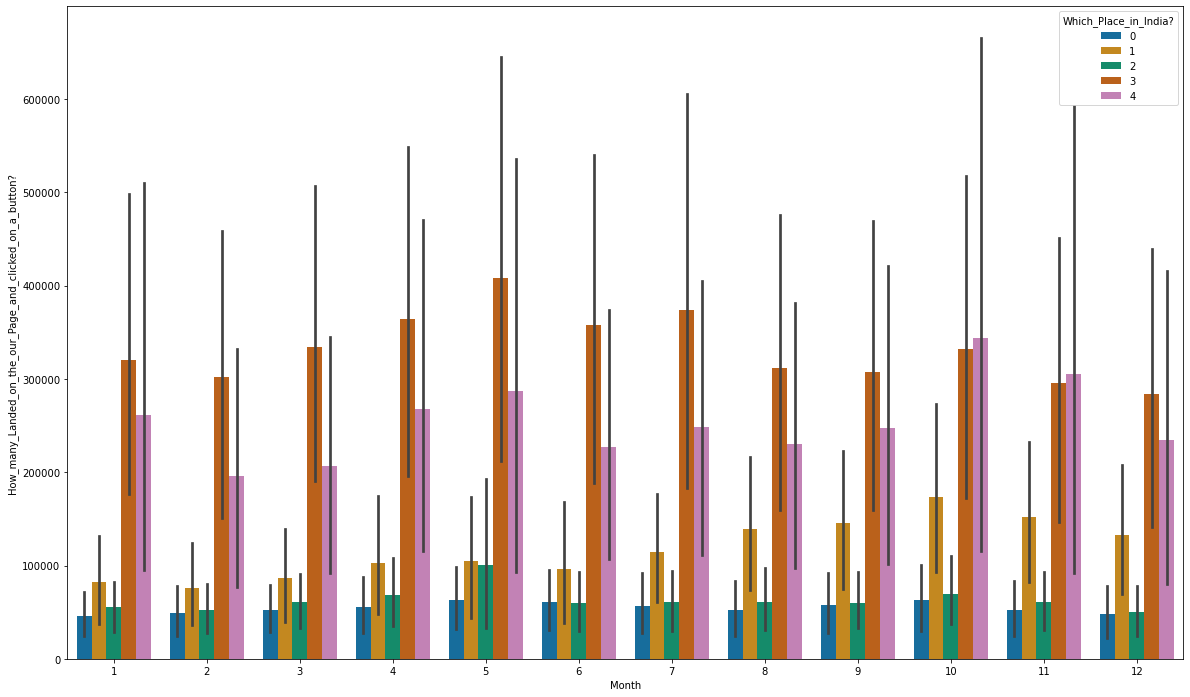

In [34]:
#1.
df19_20=data[(data['Year']==2019) | (data['Year']==2020)]
plt.figure(figsize=(20,12))
labels=['Bangalore','Chennai','Dehradun','Indore','Pune']
sns.barplot(data=df19_20,x='Month',y='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',hue='Which_Place_in_India?',palette='colorblind')




Text(0, 0.5, 'actual vc prediction for year 2022')

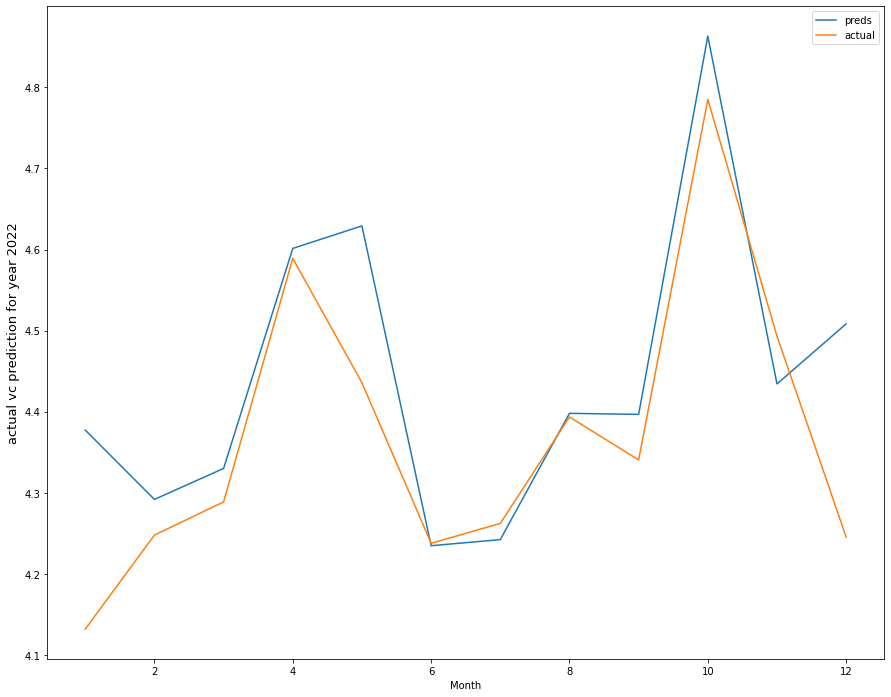

In [25]:
#2.
plt.figure(figsize=(15,12))
# first created a dataframe so we could extract year 2021 prediction and actual, values
d=x_test.join(pd.Series(y_test,name='actual')).join(pd.Series(model.predict(x_test),index=x_test.index,name='preds'))  
d2021=d[d['Year']==2021]

#let's plot
sns.lineplot(data=d2021,x='Month',y='preds',ci=None)
sns.lineplot(data=d2021,x='Month',y='actual',ci=None)
plt.legend(['preds','actual'])
plt.ylabel('actual vc prediction for year 2022',fontsize=13)

# Part 6: About the Previous projects
● Please describe any interesting project you did in the Data Science domain in more than 250 words. Attach
Github links if possible

**Project Title :  ANDRIOD_AUTHENTICITY_PREDICTION**

**Problem Statement**: This dfset consists of apps needed permissions during installation and run-time. We collect apps from three different sources google play, third-party apps and malware dataset. This file contains more than 30,000 Android apps. features extracted at the time of installation and execution. One file contains the name of the features and others contain .apk file corresponding to it extracted permissions with respective package. Apps are collected from Google's play store, hiapk, app china, Android, mumayi , gfan slideme, and pandaapp. These .apk files collected from the last three years continuously and contain 81 distinct malware families. But, Here you are only supposed to predict whether the app is benign(0) or malware(1).

**Attribute Information :**

There are total 183 independent variables and 1 dependent feature which are as follows :

1 . App :- Name of the App

2 . Package :- OBB/Data package installed in root folder

3 . Category :- App Category (eg. Entertainment, Adventure, puzzle, Action, Antivirus, etc.)

4 . Description :- App Description

5 . Rating :- Rating out of 5

6 . Number of ratings :- No. of Ratings given by users

7 . Price :- Price of the App

8 . Related apps :- Apps related to installed App

9 . Dangerous (D) permissions count :- No. of Dangerous Permissions allowed by user

10 . Safe (S) permissions count :- No. of Safe Permissions allowed by user

11-183 .are different types of permission

184 . Class :- 0 : Benign , 1 : Malware   (***Class variable***)


**Primary Goal :** As this is a classification problem ,the primary goal of this project was to classify whether the app is malware or not.

**Problem Faced :**
1. The main issue i faced while doing this project was when i was going through data pre-processing stage,in the stage of outlier removal ,there were total around 800 outlier data point but when i did some EDA ,i came to know that out of 800 outlier ,more than 500 datapoints were related to class 1 which were the malware apps,if i would have removed those outliers ,there would have been an issue of data leakage,therefore i did not removed all the outliers totally.

2. After that ,as we know there are more than 150 independent variable ,so i performed feature extraction and feature selection to ged ridd off from the curse of high dimensionality.

**Solution :**
1. Performed EDA to get to know about data.
2. Went through Data wrangling and pre-processing stage.
3. Performed Feature Extarction and Feature Selection.
4. Performed feature scaling.
5. train test split
6. applied Ensembling technique called XGBoost
7. Improved f1-score from 74 to 85. 


**GitHub :**https://github.com/ajayn3300/Android-Authenticity-Prediction--Classification-.git


# Part 7 : Time management

● **Can you please share your thoughts, in less than 120 words, on “If you get selected, how will you manage
your time for this full-time internship opportunity”**

Look, you know why i am submitting this project on exact the last date of submitting this assigment , even i started doing this project today which is last day of submission because i have already planned in my mind while i was reading about this project,i knew there is nothing that i don't know or that will take time for me to do this ,if i had known already that there are some point or things which i don't know or i have to learn these things ,i would have started this project 2 days ago I ,sacrificing other important things , hope you get it what i am trying to say.Now i will submit this project (time 15:33) and i wish i am the person you are looking for you organisation. Thank you!*